In [74]:

import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



In [75]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(dataframe.columns)
dataframe.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
dataframe = dataframe.drop(columns=['PassengerId','Name','SibSp','Ticket','Cabin', 'Embarked'])
dataframe.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,22.0,0,7.2500
1,1,1,female,38.0,0,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,0,53.1000
4,0,3,male,35.0,0,8.0500


In [77]:
encoder = LabelEncoder()
dataframe['Sex'] = encoder.fit_transform(dataframe['Sex'])

<Axes: >

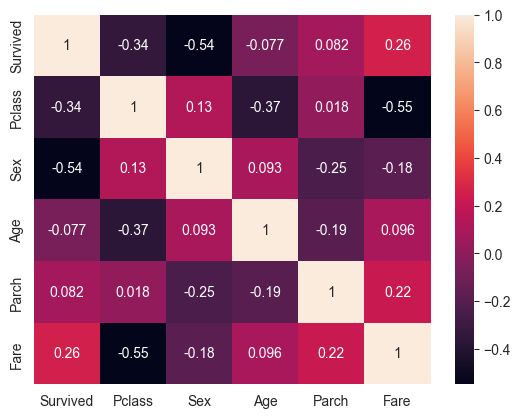

In [78]:
sns.heatmap(dataframe.corr(), annot=True)

In [79]:
X, y = dataframe.drop(columns='Survived'), dataframe['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred = pd.DataFrame(model.predict(X_test))

In [82]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[145,  23],
       [ 34,  66]], dtype=int64)

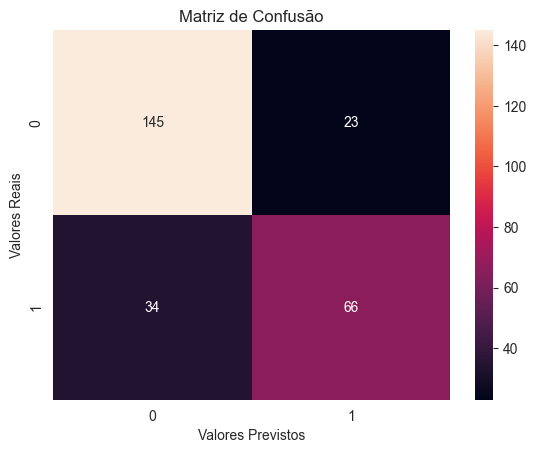

In [87]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       168
           1       0.74      0.66      0.70       100

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.79      0.78       268

